In [1]:
import pandas as pd
import numpy as np

# Data visualization library matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager

import mimetypes
import urllib
import os


from google.colab import drive	
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/MyDrive/Paper-Viz-master/Example_Data/hist/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Paper-Viz-master/Images/'

In [3]:
class hist_plot:
    # read data
  def read_file(self,file):
    file_url = urllib.request.pathname2url(file)
    ftype = mimetypes.guess_type(file_url, strict=True)[0]
    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data from the parking dataset
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data from the parking dataset
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from the parking dataset
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data

  # check the available file name
  # if the input file name already existed then rename to file_1, file_2
  def get_available_name(self,filename):
    n=[1]
    def check_meta(file_name):
        file_name_new=file_name
        if file_name in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
            file_name_new=file_name+'_'+str(n[0])
            n[0]+=1
        if file_name_new in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
            file_name_new=check_meta(file_name)
        return file_name_new
    available_name=check_meta(filename)
    return available_name

  # file: file name of your data source
  # x_col_name: ['x_column_name_a','x_column_name_b'...]
  # paper_type : 'single' or 'double'
  def hist(self,file ,x_col_name,paper_type ,**kwargs):
    # Configuration of the histogram chart
    # plotwidth: width of the plot
    # plotheight: height of the plot
    # my_font: the typeface of x, y labels
    # backgrid: backgrid of the plot
    # isframe: frame of the plot
    # labeltext_size: text size of x,y labels
    # labelpad: pad size of label
    # gridlinewidth: the width of grid
    # linewidth: the line width of each bin
    # legend_size: size of legend
    # legend_loc: location of legend
    # title: True or False as options. If it is True, add title for the plot
    # title_pad: if the title is True, modify pad size of title
    # title_size: if the title is True, modify size of title
    # title_loc: if the title is True, modify location of title
    # x_label: the content of x label
    # y_label: the content of y label
    # color: the color of histogram
    # edgecolor: the color of bins outlines
    # alpha: the alpha of bins
    # histtype: the type of histogram
    # orientation: vertical or horizontal
    # stacked: True or False, if true, draw stack histogram
    # bins: set the number of bins
    # density: True or False, if true, the y axis means the density of each bins
    # density_line: True or False, if true, draw the density line of histogram
    # tick_size: set the size of ticks
    # tick_direction: set the direction of ticks
    # save_image: True or False as options. If it is True, save chart
    # savefig_bbox_inches: Bounding box in inches
    # file_name: the file name in saving image

    single_column_conf={ 'plotwidth':8,
                        'plotheight':6, 
                        'my_font':'DejaVu Sans',
                        'backgrid':True,
                        'isframe':True,
                        'labeltext_size':25,
                        'labelpad':10,
                        'gridlinewidth':0.5,
                        'linewidth':2,
                        'legend_size':15,
                        'legend_loc':'upper right', 
                        'title':False,
                        'title_pad':10,
                        'title_size':20,
                        'title_loc':'center', 
                        'x_label':None,
                        'y_label':None, 
                        'color':sns.color_palette("hls", 8),
                        'edgecolor':'black',
                        'alpha':0.7,
                        'orientation':'vertical',
                        'histtype':'bar',
                        'stacked':False,
                        'bins':None,
                        'density':False,
                        'density_line':False,
                        'tick_size':20,
                        'tick_direction':'out',
                        'save_image':False,
                        'savefig_bbox_inches':'tight',
                        'file_name':'histogram'                    
                        }
    double_column_conf={ 'plotwidth':8,
                        'plotheight':6, 
                        'my_font':'DejaVu Sans',
                        'backgrid':True,
                        'isframe':True,
                        'labeltext_size':26,
                        'labelpad':10,
                        'gridlinewidth':0.5,
                        'linewidth':2,
                        'legend_size':17,
                        'legend_loc':'upper right', 
                        'title':False,
                        'title_pad':10,
                        'title_size':21,
                        'title_loc':'center', 
                        'x_label':None,
                        'y_label':None, 
                        'color':sns.color_palette("hls", 8),
                        'edgecolor':'black',
                        'alpha':0.7,
                        'orientation':'vertical',
                        'histtype':'bar',
                        'stacked':False,
                        'bins':None,
                        'density':False,
                        'density_line':False,
                        'tick_size':21,
                        'tick_direction':'out',
                        'save_image':False,
                        'savefig_bbox_inches':'tight',
                        'file_name':'histogram'                      
                        }
                   
    # choose configuration
    if paper_type == 'single':
      conf = single_column_conf
    elif paper_type == 'double':
      conf = double_column_conf  

    # when new configuraton is set, update the original one
    conf.update(kwargs)  

    # create figure and set figure size  
    fig, ax_left = plt.subplots(figsize = (conf['plotwidth'], conf['plotheight']))
    # background grid setting
    if conf['backgrid'] == True:
      ax_left.grid(linestyle="--", linewidth=conf['gridlinewidth'], color='gray', alpha=0.5)                    
    # x,y label setting
    ax_left.set_xlabel(conf['x_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    ax_left.set_ylabel(conf['y_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    
    # read file 
    try:
      data = self.read_file(file)
    except Exception:
      print('Sorry, this file does not exist, please check the file name')
   
    #plot
    # single column histogram
    if len(x_col_name) == 1:
      pal=conf['color']
      n, bins, patches=ax_left.hist(data[x_col_name[0]],bins=conf['bins'],density=conf['density'],alpha=conf['alpha'],
                                    orientation=conf['orientation'],histtype=conf['histtype'],stacked=conf['stacked'],
                                    )      
      pal=sns.color_palette('hls',len(patches))
      # change the color of bins
      for i in range(len(patches)):
        patches[i].set_color(pal[i])
        patches[i].set_edgecolor('black')
      # if density is true, the histogram means density, if density_line is True, draw density line
      if conf['density'] ==True and conf['density_line']==True:
        # get the density line
        mu=np.mean(data[x_col_name[0]])
        sigma=np.std(data[x_col_name[0]])
        y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
          np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
        ax_left.plot(bins,y,'-',color='black',linewidth=1)
    # multi columns histogram (separate simple histogram or stacked histogram)
    if len(x_col_name) != 1:
      # stacked histogram
      if conf['stacked'] != True:
        for i in range(len(x_col_name)):
          n, bins, patches=ax_left.hist(data[x_col_name[i]],bins=conf['bins'],density=conf['density'],alpha=conf['alpha'],
                                      color=conf['color'][i],orientation=conf['orientation'],histtype=conf['histtype'],stacked=conf['stacked'],label=x_col_name[i])
          mu=np.mean(data[x_col_name[i]])
          sigma=np.std(data[x_col_name[i]])
          for i in range(len(patches)):
            patches[i].set_edgecolor('black')  
          if conf['density'] ==True and conf['density_line']==True:
            # get density line
            y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
              np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
            ax_left.plot(bins,y,'-',color='black',linewidth=1)
      # simple histogram
      else:  
        datalist=[]
        num=0
        for i in range(len(data)):
          datalist.append(data.loc[i].values)
          # set the size of palette
          if len(data.loc[i].values)>num:
            num=len(data.loc[i].values)
        data=np.array(datalist)
        # each columns has one color
        color=sns.color_palette("hls", num)
        n, bins, patches=ax_left.hist(data,bins=conf['bins'],density=conf['density'],alpha=conf['alpha'],
                                      color=color,orientation=conf['orientation'],histtype=conf['histtype'],stacked=conf['stacked'],edgecolor=conf['edgecolor'],label=x_col_name)
    
      ax_left.legend(loc=conf['legend_loc'], fontsize=conf['legend_size'])
    # frame setting
    if conf['isframe'] == False:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    # set x, y tick's direction, default:out, can be set to in,out,inout
    if conf['tick_direction'] == 'in':
      matplotlib.rcParams['xtick.direction'] = 'in'
      matplotlib.rcParams['ytick.direction'] = 'in'
    elif conf['tick_direction'] == 'inout':
      matplotlib.rcParams['xtick.direction'] = 'inout'
      matplotlib.rcParams['ytick.direction'] = 'inout'
    elif conf['tick_direction'] == 'out':
      matplotlib.rcParams['xtick.direction'] = 'out'
      matplotlib.rcParams['ytick.direction'] = 'out'
    # set the tick size
    for tick in ax_left.xaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])
    for tick in ax_left.yaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])
    if conf['title'] == False:
      pass
    else:
      ax_left.set_title(conf['title'], fontsize=conf['title_size'], loc=conf['title_loc'], pad=conf['title_pad'])
    # save the plot
    if conf['save_image'] == True:
      file_name=conf['file_name']
      file_newname = self.get_available_name(file_name)
      plt.savefig(path_img+file_newname, bbox_inches=conf['savefig_bbox_inches'],dpi=600,format='jpg') 
     
    # showing the image
    plt.show() 

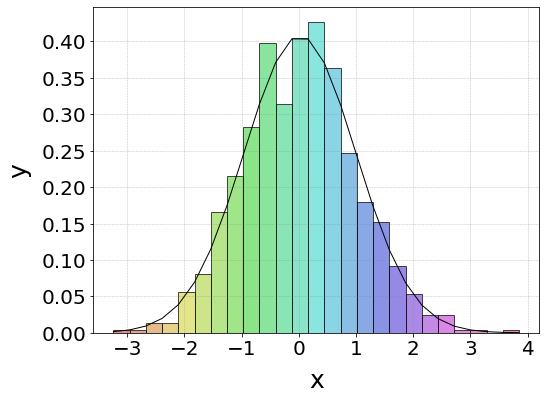

In [4]:
# single column density histogram with density line
h1=hist_plot()
h1.hist('1.xlsx',x_col_name=['1'],x_label='x',y_label='y',paper_type='single',bins=25,density=True, density_line=True,save_image=True)

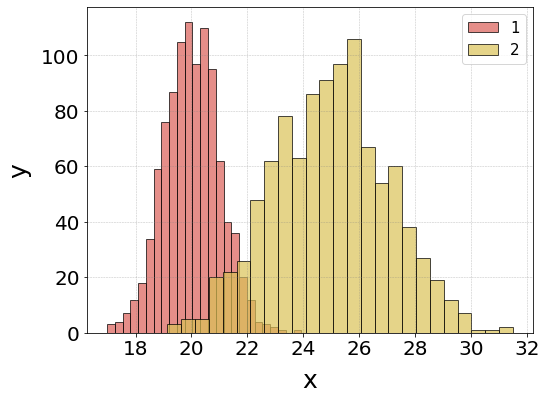

In [5]:
# multiple columns simple histogram (y axis means numbers)
h2=hist_plot()
h2.hist('2.xlsx',x_col_name=['1','2'],x_label='x',y_label='y',paper_type='single',bins=25,save_image=True)

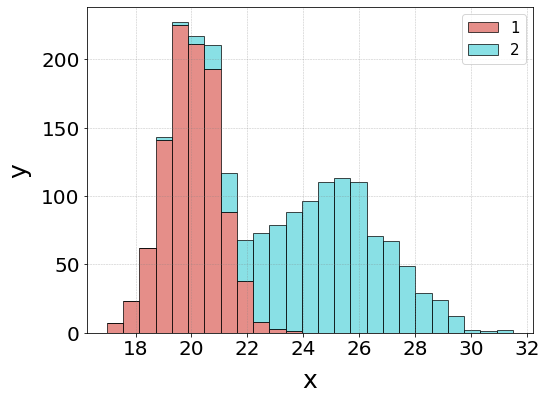

In [6]:
# stacked histogram
h3=hist_plot()
h3.hist('2.xlsx',x_col_name=['1','2'],x_label='x',y_label='y',paper_type='single',bins=25,stacked=True,save_image=True)